# Plot local current maps in an optimized way

### imports:

In [1]:
# Python
import sys
from itertools import product

# Anaconda
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# Kwant
import kwant
import tinyarray
import kwant.continuum

# This repository
from hamiltonians import gasb_hamiltonian as gasb
from transport_tools import bands_and_currents as trans
from system_geometry import shapes

In [2]:
path_data_currents = "./data/local_currents/97_currents_eF_62.0meV_Fermi_439.961meV_VShift_100_lead_0_gammaLead_36.917.npz"
path_data_bands     = "./data/band_structure/97_band_eF_62.0meV_0.25BZ_Nkx_501.npz"

list_curent_name = list(path_data_currents.split('_'))
print("Fermi energy = ",list_curent_name[-7][:-3], " meV")

Fermi energy =  439.961  meV


In [3]:
# Load the data

def load_currents(path):
    data = np.load(path)
    total, up, down = data["Total"], data["Up"], data["Dn"] 
    return total, up, down

total_current, up_current, down_current = load_currents(path_data_currents)
all_currents = [total_current, up_current, down_current]
color_maps   = ["Oranges", "Reds", "Blues"]
current_type = ["total","up","down"]

bands_total = np.load(path_data_bands)
kx, E_free, E_conf = bands_total['kx'], bands_total['E_free'], bands_total['E_conf']


In [4]:
def make_system(esp="97", gammaLead=36.917, V_shift=100, width = shapes.W_STD, length = shapes.L_STD):
    shapeScattering = shapes.Rect(width, length)

    # folder_fig = esp + folder_suf

    params_raw = eval("gasb.params_" + esp)
    params_dict = dict(GammaLead =  gammaLead, V = V_shift, **params_raw)
    hamiltonian_syst = eval("gasb.hamiltonian_" + esp + "_k_plus()")

    hamiltonian_lead = gasb.free_ham(norbs = 6)
    sistema          = gasb.system_builder(hamiltonian_syst, hamiltonian_lead, shapeScattering)

    return sistema

In [5]:

# Formatação para os gráficos:
FONT_LABELS = 24
FONT_TITLES = 24
font = {'family' : 'serif', 'weight' : 'bold', 'size': FONT_LABELS}
matplotlib.rc('font', **font)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def formatter_current_axis(value, tick_number):
    #
    "Function for changing units of axis"
    return int(round(value * shapes.A0/10))

def edit_axis(axis, spin):
    "Editing axis"
    axis.set_ylim(-shapes.W_STD/2, shapes.W_STD/2)
    axis.xaxis.set_major_locator(plt.MultipleLocator(shapes.L_STD/2))
    axis.yaxis.set_major_locator(plt.MultipleLocator(shapes.W_STD/2))
    if spin.lower() == 'down':
        axis.xaxis.set_major_formatter(plt.FuncFormatter(formatter_current_axis))
        axis.yaxis.set_major_formatter(plt.FuncFormatter(formatter_current_axis))
        axis.set_xlabel(r'$x$ [nm]',fontsize=FONT_TITLES)
        axis.set_ylabel(r'$y$ [nm]',fontsize=FONT_TITLES, rotation=90)
 

In [6]:
# (Re)Make the system
syst = make_system()

<IPython.core.display.Javascript object>


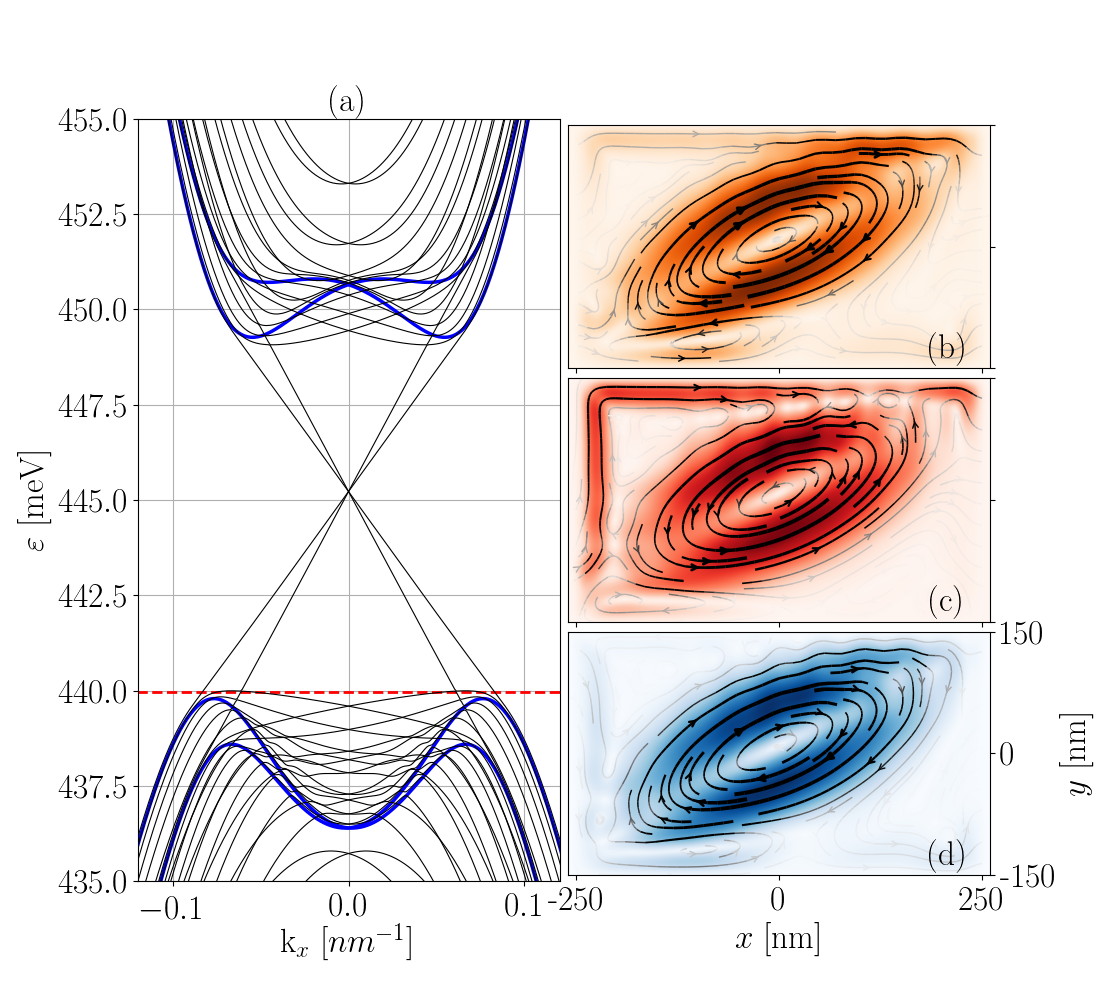

In [9]:
L = 11
W = .9*L
F = plt.figure(1, (L, W))

ax_bands = plt.subplot(121)

grid_current = ImageGrid(F, 122,  # similar to subplot(122) row-column-num
                 nrows_ncols=(3, 1),
                 axes_pad=0.1,
                 add_all=True,
                 label_mode="1",
                 )

# Plot the bandstructure
fermi_energy = float(list_curent_name[-7][:-3])
trans.bands_cont2D_and_discr(axis = ax_bands,
                            free_elec_energies = E_free,
                            confined_elec_energies = E_conf,
                            momenta = kx,
                            kx_max = 0.12,
                            E_min = 435,
                            E_max = 455,
                            E_line = fermi_energy)


# Plot the maps for currents

axes_currents = [grid_current[0], grid_current[1], grid_current[2]]
labels = [r'(b)',r'(c)',r'(d)']

for current, colormap, name, label, axis in zip(all_currents, color_maps, current_type, labels, axes_currents):
    axis.yaxis.tick_right()
    axis.yaxis.set_label_position("right")
    kwant.plotter.current(syst, current, cmap = colormap, colorbar = False, show = False, ax=axis)
    
    axis.text(0.9, 0.01, label, horizontalalignment='center',
         verticalalignment='bottom', transform=axis.transAxes, fontsize=24)
    
    edit_axis(axis, name)
plt.subplots_adjust(wspace = 0.02)
# plt.tight_layout()
plt.show()

In [30]:
path_condu_band_data = './data/local_currents/97_currents_eF_62.0meV_Fermi_449.0878meV_VShift_100_lead_0_gammaLead_36.917.npz' 
path_dirac_band_data = './data/local_currents/97_currents_eF_62.0meV_Fermi_447.5meV_VShift_100_lead_0_gammaLead_36.917.npz'
path_valen_band_data = './data/local_currents/97_currents_eF_62.0meV_Fermi_439.961meV_VShift_100_lead_0_gammaLead_36.917.npz'

all_paths = [path_condu_band_data, path_dirac_band_data, path_valen_band_data]

<IPython.core.display.Javascript object>


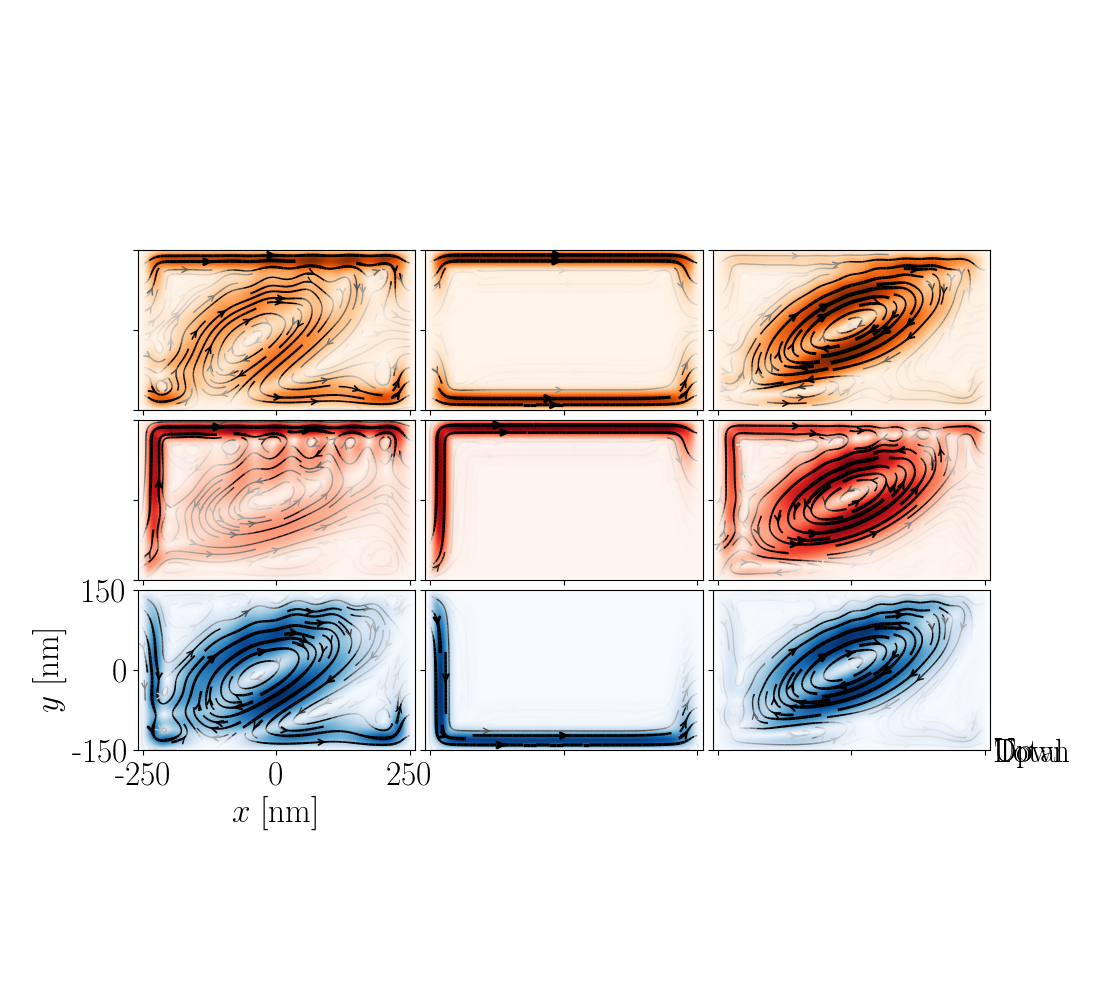

In [43]:
L = 11
W = .9*L
F = plt.figure(1, (L, W))

grid_all_currents = ImageGrid(F, 111,  # similar to subplot(111) row-column-num
                     nrows_ncols=(3, 3),
                     axes_pad=0.1,
                     add_all=True,
                     label_mode="1",
                     )

color_maps   = ["Oranges", "Reds", "Blues"]
current_type = [r"Total",r"Up",r"Down"]
labels = [r'(A)',r'(B)',r'(C)']

for column, path_data_current, label in zip(range(3), all_paths, labels):
    # Data loading:
    total_current, up_current, down_current = load_currents(path_data_current)
    all_currents = [total_current, up_current, down_current]
    
    for current, colormap, name, row in zip(all_currents, color_maps, current_type, range(3)):
        # Plot using kwant:
        kwant.plotter.current(syst,
                              current,
                              cmap = colormap,
                              colorbar = False,
                              show = False, ax=grid_all_currents[row*3+column])
        edit_axis(grid_all_currents[row*3+column], name)
        if row == 0:
            grid_all_currents[row*3+column].text(0.5, 1.01, label, 
                         horizontalalignment='center',
                         verticalalignment='bottom', 
                         transform=axis.transAxes, 
                         fontsize=24)
        if column == 2:
            grid_all_currents[row*3+column].text(1.01, 0.5, name, 
                         horizontalalignment='left',
                         verticalalignment='center', 
                         transform=axis.transAxes, 
                         fontsize=24)
    
plt.show()

In [40]:
a = r'Total'
print(a.lower()=='total')

True


In [8]:
file1 = open('data_62_64_eF_final','r')
file2 = open('data_62_64_transport_final','r')

FileNotFoundError: [Errno 2] No such file or directory: 'data_62_64_eF_final'

In [ ]:
x_raw = file1.read()

In [ ]:
x_raw = x_raw[1:-1]

In [ ]:
x_raw

In [ ]:
    x_list = x_raw.split(" ")
    x_list2 = [el.rstrip('\n') for el in x_list]

In [ ]:
x_new = []
for el in x_list:
    if el != '':
        x_new.append(el)

x_new = [el.rstrip('\n') for el in x_new]
x_new

In [ ]:
def prepara_array(dados):

    dados = dados[1:-1]

    x_list = dados.split(" ")
    x_list = [el.rstrip('\n') for el in x_list]

    x_new = []
    for el in x_list:
        if el != '':
            x_new.append(float(el))
    return x_new

In [ ]:
def prepara_list(dados):

    dados = dados[1:-1]

    x_list = dados.split(", ")
#     x_list = [el.rstrip('\n') for el in x_list]

    x_new = []
    for el in x_list:
        if el != '':
            x_new.append(float(el))
    return x_new

In [ ]:
y_raw = file2.read()

In [ ]:
y_num = prepara_list(y_raw)

In [ ]:
y_num